( 0 )  [1. 0. 0. 0. 0. 0. 0. 0. 0.]   0
( 1 )  [1. 1. 0. 0. 0. 0. 0. 0. 0.]   0
( 2 )  [1. 1. 1. 0. 0. 0. 0. 0. 0.]   0
( 3 )  [1. 0. 1. 1. 0. 0. 0. 0. 0.]   0
( 4 )  [1. 1. 0. 1. 1. 0. 0. 0. 0.]   0
( 5 )  [1. 1. 1. 0. 1. 1. 0. 0. 0.]   0
( 6 )  [1. 1. 1. 1. 0. 1. 1. 0. 0.]   0
( 7 )  [1. 0. 1. 1. 1. 0. 1. 1. 0.]   0
( 8 )  [0. 1. 1. 0. 1. 1. 0. 1. 1.]   0
( 9 )  [0. 0. 1. 1. 0. 1. 1. 1. 1.]   0
( 10 )  [0. 0. 0. 1. 1. 1. 1. 1. 0.]   1
( 11 )  [0. 0. 0. 0. 1. 1. 1. 1. 1.]   1
( 12 )  [0. 0. 0. 0. 0. 1. 1. 1. 1.]   2
( 13 )  [1. 0. 0. 0. 0. 0. 1. 1. 1.]   1
( 14 )  [1. 1. 0. 0. 0. 0. 0. 1. 1.]   1
( 15 )  [1. 1. 1. 0. 0. 0. 0. 0. 1.]   1
( 16 )  [1. 0. 1. 1. 0. 0. 0. 0. 0.]   1
( 17 )  [1. 1. 0. 1. 1. 0. 0. 0. 0.]   1
( 18 )  [1. 0. 1. 0. 1. 1. 0. 0. 0.]   1
( 19 )  [1. 0. 0. 1. 0. 1. 1. 0. 0.]   0
( 20 )  [1. 1. 0. 0. 1. 0. 1. 1. 0.]   0
( 21 )  [1. 1. 1. 0. 0. 1. 1. 1. 0.]   0
( 22 )  [0. 1. 1. 1. 0. 0. 1. 1. 1.]   0
( 23 )  [0. 1. 0. 1. 1. 0. 1. 1. 0.]   1
( 24 )  [0. 0. 1. 1. 0. 1.

Text(0, 0.5, 'Number of aircraft')

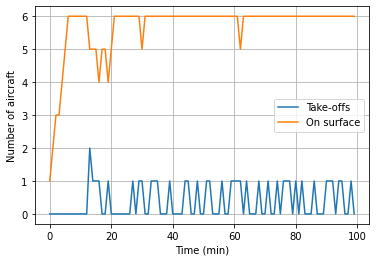

In [ ]:
# DTMC example: N-control at LGA airport
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

thPB = 6  # Pushback clearance if # a/c < threshold : N

c1 = 0.5140 # Bernoulli RV parameter for take-off clearance
c2 = 0.0929 # Bernoulli RV parameter for take-off clearance
nRwy = 3  # Max runway queue size

nTwy = 9 # Number of taxiway segments
pTaxi = 0.9084  # Prob of taxi forward

tWindow = 100 # Time window in minutes

runway = 0  # Current runway queue size
taxiway = np.zeros(nTwy)  # Current taxiway status

nTO = np.zeros(tWindow) # Number of take-offs
nTX = np.zeros(tWindow) # Number of a/c

for t in range(tWindow):
  # Take-off clearance
  if runway > 0:
    nTOclear = (rng.random() < c1) + (rng.random() < c2)  # Sum of two Bernoulli RVs
    nTO[t] = min(nTOclear, runway)
    runway = max(0, runway-nTOclear)
  
  # Taxi
  if runway < nRwy and taxiway[-1] == 1 and rng.random() < pTaxi:
    runway += 1
    taxiway[-1] = 0
  for i in range(nTwy-2, -1, -1):
    if taxiway[i] == 1 and taxiway[i+1] == 0 and rng.random() < pTaxi:
      taxiway[i+1] = 1
      taxiway[i] = 0
  
  # Pushback
  if taxiway[0] == 0 and (taxiway.sum()+runway) < thPB:
    taxiway[0] = 1
  
  nTX[t] = taxiway.sum() + runway
  # Print status
  print("(", t, ") ", taxiway, " ", runway)

plt.plot(nTO, label="Take-offs")
plt.plot(nTX, label="On surface")
plt.legend()
plt.grid(True)
plt.xlabel("Time (min)")
plt.ylabel("Number of aircraft")

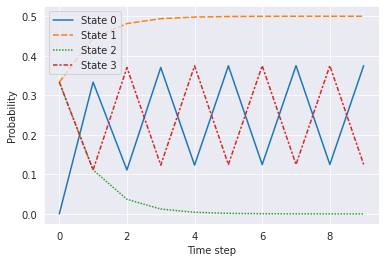

In [ ]:
# DTMC example: 3 eq. classes
import numpy as np
from numpy.linalg import matrix_power
import pandas as pd
import seaborn as sns

P = np.array([[0, 0, 0, 1], [0, 1, 0, 0], [0, 1/3, 1/3, 1/3], [1, 0, 0, 0]])

X0 = np.array([0, 0, 1, 0])

tWindow = 10  # Time step
X = np.ndarray(shape = (tWindow, 4))
for t in range(tWindow):
  X[t,] = np.dot(X0, matrix_power(P, t+1))

# print(X)
df = pd.DataFrame(X, columns=["State 0", "State 1", "State 2", "State 3"])
ax = sns.lineplot(data = df)
ax.set_xlabel("Time step")
ax.set_ylabel("Probability")
sns.set_style("darkgrid")

[[0.57142857 0.42857143]
 [0.57142857 0.42857143]]
Eigen value =  [1.  0.3]
[[ 0.8        -0.70710678]
 [ 0.6         0.70710678]]


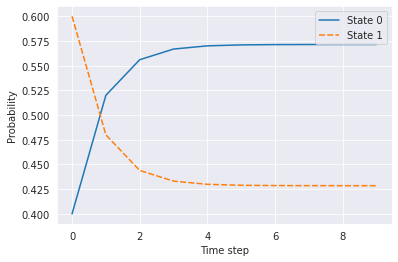

In [ ]:
# DTMC example: Long-run behavior
import numpy as np
from numpy.linalg import matrix_power

P = np.array([[0.7, 0.3], [0.4, 0.6]])

X0 = np.array([0, 1])

tWindow = 10  # Time step
X = np.ndarray(shape = (tWindow, 2))
for t in range(tWindow):
  X[t,] = np.dot(X0, matrix_power(P, t+1))

print(matrix_power(P, 100))

eigenVal, eigenVec = np.linalg.eig(P.transpose())
print("Eigen value = ", eigenVal)
print(eigenVec) # Columns are the eigenvectors

df = pd.DataFrame(X, columns=["State 0", "State 1"])
ax = sns.lineplot(data = df)
ax.set_xlabel("Time step")
ax.set_ylabel("Probability")
sns.set_style("darkgrid")

In [29]:
# Simple MDP example w/ Gurobi optimizer

%pip install gurobipy
import gurobipy as gp
from gurobipy import GRB
import numpy as np

state = range(3)  # Number of stock: 0~2
action = range(2) # Order 0~1
prob_demand = [0.3, 0.7] # P(demand = 0), P(demand = 1)

P = np.zeros((3, 2, 3))  # P(j|i & a) : i-a-j
P[0, 0, 0] = 1
P[0, 1, 0] = 0.7
P[0, 1, 1] = 0.3
P[1, 0, 0] = 0.7
P[1, 0, 1] = 0.3
P[1, 1, 1] = 0.7
P[1, 1, 2] = 0.3
P[2, 0, 1] = 0.7
P[2, 0, 2] = 0.3

cost = np.zeros((3, 2))  # Cost
cost[0, 0] = 1
# cost[0, 1] = 0.2
# cost[1, 0] = 0.2

state_action = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0)] # (2, 1) is infeasible


coeff = {(i, a): cost[i, a] for (i, a) in state_action} # Cost coefficient
P_dict = []
for j in range(3):
  P_dict.append({(i, a): P[i, a, j] for (i, a) in state_action})

m = gp.Model('MDP')
pi = m.addVars(state_action, name = 'Pi')
m.addConstr(pi.sum() == 1, name = 'TotalConstr')
m.addConstrs((pi.sum(j, '*') == pi.prod(P_dict[j]) for j in range(3)), name = 'SumConstr')
m.setObjective(pi.prod(coeff), GRB.MINIMIZE)
# m.write('MDP.lp')
m.optimize()

m.display()

print('Obj value: ', m.objVal)

for i, a in pi.keys():
  print('pi[', i, ',', a, '] = ', pi[i, a].x)



Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 4 rows, 5 columns and 13 nonzeros
Model fingerprint: 0x6fce9020
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 5 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Minimize
  <gurobi.LinExpr: Pi[0,0]>
Subject To
  TotalConstr: <gurobi.LinExpr: Pi[0,0] + Pi[0,1] + Pi[1,0] + Pi[1,1] + Pi[2,0]> = 1
  SumConstr[0]: <gurobi.LinExpr: 0.30000000000000004 Pi[0,1] + -0.7 Pi[1,0]> = 0
SumConstr[1]: <gurobi.LinExpr: -0.3 Pi[0,1] + 0.7 Pi[1,0] + 0.30000000000000004 Pi[1,1]

In [42]:
# Airport DTMC example

%pip install gurobipy
import gurobipy as gp
from gurobipy import GRB
import numpy as np

cell_taxiway = 3 # Number of taxiway cells
max_runway_queue = 2  # Runway queue size
cell_runway = len(np.binary_repr(max_runway_queue))  # Number of runway queue cells
num_cell = cell_taxiway + cell_runway

num_state = 2**cell_taxiway * (max_runway_queue+1)  # Number of states

prob_takeoff = 0.7  # P(take-off clearance)
prob_taxi = 0.9 # P(taxi forward)


def dec2bin(number, length=1):
  return np.array(list(np.binary_repr(number, length)), dtype=int)

def bin2dec(number):
  length = len(number)
  return np.dot(number, [2**x for x in range(length-1, -1, -1)])

def idx2state(idx):
  state_taxiway = dec2bin(idx % 2**cell_taxiway, cell_taxiway)
  state_runway = idx//(2**cell_taxiway)
  return (state_taxiway, state_runway)

def state2idx(state_taxiway, state_runway):
  return bin2dec(state_taxiway) + state_runway*(2**cell_taxiway)

def calculate_taxi_prob(idx_current, idx_ac):
  if len(idx_ac) == 0:
    return (np.array([idx_current]), np.array([1]))
  else:
    idx_return = np.array([], dtype = int)
    prob_return = np.array([], dtype = float)
    (state_taxiway, state_runway) = idx2state(idx_current)
    idx_pop = idx_ac[-1]  # Last ac
    idx_ac = idx_ac[:-1]
    
    if idx_pop == cell_taxiway-1 and state_runway < max_runway_queue: # Can enter the rwy queue
      state_taxiway[-1] = 0
      (idx_temp, prob_temp) = calculate_taxi_prob(state2idx(state_taxiway, state_runway+1), idx_ac)
      idx_return = np.append(idx_return, idx_temp)
      prob_return = np.append(prob_return, prob_temp*prob_taxi)

      (idx_temp, prob_temp) = calculate_taxi_prob(idx_current, idx_ac)
      idx_return = np.append(idx_return, idx_temp)
      prob_return = np.append(prob_return, prob_temp*(1-prob_taxi))
      return (idx_return, prob_return)
    elif idx_pop < cell_taxiway-1 and state_taxiway[idx_pop+1] == 0:  # Can taxi forward
      state_taxiway[idx_pop] = 0
      state_taxiway[idx_pop+1] = 1
      (idx_temp, prob_temp) = calculate_taxi_prob(state2idx(state_taxiway, state_runway), idx_ac)
      idx_return = np.append(idx_return, idx_temp)
      prob_return = np.append(prob_return, prob_temp*prob_taxi)

      (idx_temp, prob_temp) = calculate_taxi_prob(idx_current, idx_ac)
      idx_return = np.append(idx_return, idx_temp)
      prob_return = np.append(prob_return, prob_temp*(1-prob_taxi))
      return (idx_return, prob_return)
    else:
      return calculate_taxi_prob(idx_current, idx_ac)


prob_transition = np.zeros((num_state, num_state))

for idx in range(num_state):
  (state_taxiway, state_runway) = idx2state(idx)
  idx_ac = np.flatnonzero(state_taxiway)
  
  print('State ', idx, ':', state_taxiway, state_runway)

  idx_next = np.array([], dtype = int)
  prob_next = np.array([], dtype = float)

  if state_runway > 0:
    (idx_temp, prob_temp) = calculate_taxi_prob(state2idx(state_taxiway, state_runway-1), idx_ac)
    idx_next = np.append(idx_next, idx_temp)
    prob_next = np.append(prob_next, prob_temp*prob_takeoff)

    (idx_temp, prob_temp) = calculate_taxi_prob(idx, idx_ac)
    idx_next = np.append(idx_next, idx_temp)
    prob_next = np.append(prob_next, prob_temp*(1-prob_takeoff))
  else:
    (idx_next, prob_next) = calculate_taxi_prob(idx, idx_ac)

  print('Next idx :', idx_next, ', Corresponding prob : ', prob_next)
  for j, v in enumerate(idx_next):
    prob_transition[idx, v] = prob_next[j]

print(prob_transition)
# print(prob_transition.sum(axis=1))

state_action = []
for idx in range(num_state):
  state_action.append((idx, 0)) # No taxi clearance
  
  (state_taxiway, state_runway) = idx2state(idx)
  if state_taxiway[0] == 0: # No ac at taxiway entry
    state_action.append((idx, 1)) # Taxi clearance

print('Feasible (state, action) = ', state_action)

P_dict = []
for j in range(num_state):
  temp_dict = {}  # dict for j
  for (i, a) in state_action:
    (state_taxiway, state_runway) = idx2state(i)
    state_taxiway[0] = a
    idx_new = state2idx(state_taxiway, state_runway)
    temp_dict[(i, a)] = prob_transition[idx_new, j]
  P_dict.append(temp_dict)
  print('{(i, a): P[i, ', j, '](a)} = ', temp_dict)

coeff = {}  # Cost coefficient
beta = 3 # Weighting factor of runway utilization
for (i, a) in state_action:
  (state_taxiway, state_runway) = idx2state(i)
  coeff[(i, a)] = state_taxiway.sum() + beta*(1 if state_runway == 0 else 0)

m = gp.Model('airportMDP')
pi = m.addVars(state_action, name = 'Pi')
m.addConstr(pi.sum() == 1, name = 'TotalConstr')
m.addConstrs((pi.sum(j, '*') == pi.prod(P_dict[j]) for j in range(num_state)), name = 'SumConstr')
m.setObjective(pi.prod(coeff), GRB.MINIMIZE)
m.optimize()

m.display()

print('Obj value: ', m.objVal)

for i, a in pi.keys():
  (state_taxiway, state_runway) = idx2state(i)
  print('Current state: ', state_taxiway, state_runway, ' pi[', i, ',', a, '] = ', pi[i, a].x)

State  0 : [0 0 0] 0
Next idx : [0] , Corresponding prob :  [1]
State  1 : [0 0 1] 0
Next idx : [8 1] , Corresponding prob :  [0.9 0.1]
State  2 : [0 1 0] 0
Next idx : [1 2] , Corresponding prob :  [0.9 0.1]
State  3 : [0 1 1] 0
Next idx : [ 9 10  3] , Corresponding prob :  [0.81 0.09 0.1 ]
State  4 : [1 0 0] 0
Next idx : [2 4] , Corresponding prob :  [0.9 0.1]
State  5 : [1 0 1] 0
Next idx : [10 12  3  5] , Corresponding prob :  [0.81 0.09 0.09 0.01]
State  6 : [1 1 0] 0
Next idx : [3 5 6] , Corresponding prob :  [0.81 0.09 0.1 ]
State  7 : [1 1 1] 0
Next idx : [11 13 14  7] , Corresponding prob :  [0.729 0.081 0.09  0.1  ]
State  8 : [0 0 0] 1
Next idx : [0 8] , Corresponding prob :  [0.7 0.3]
State  9 : [0 0 1] 1
Next idx : [ 8  1 16  9] , Corresponding prob :  [0.63 0.07 0.27 0.03]
State  10 : [0 1 0] 1
Next idx : [ 1  2  9 10] , Corresponding prob :  [0.63 0.07 0.27 0.03]
State  11 : [0 1 1] 1
Next idx : [ 9 10  3 17 18 11] , Corresponding prob :  [0.567 0.063 0.07  0.243 0.027 0.